# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
# Initial imports
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Read your api key environment variable
# YOUR CODE HERE!
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\zacha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Create a newsapi client
# YOUR CODE HERE!
api_key = os.getenv("news_api")
newsapi = NewsApiClient(api_key=api_key)


In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Facebook Libra: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]


Total articles about Facebook Libra: 4976


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Facebook Libra: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]


Total articles about Facebook Libra: 1337


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Tom Wilson',
 'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
 'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
 'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
 'publishedAt': '2020-11-23T14:16:00Z',
 'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment=analyzer.polarity_scores(text)
        compound=sentiment["compound"]
        neg=sentiment["neg"]
        neu=sentiment["neu"]
        pos=sentiment["pos"]
        
        bitcoin_sentiments.append({
            "Compound" : compound,
            "Negative" : neg,
            "Neutral" : neu,
            "Positive" : pos,
            "text": text   
        })
        
    except AttributeError:
            pass

#Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols= ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df=bitcoin_df[cols]

bitcoin_df.head()
        

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.0,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.0,0.928,0.072,Its been almost three years to the day since t...
3,0.2023,0.0,0.950,0.050,"In November 2017, after an absolutely massive,..."
4,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [7]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text=article["content"]
        date=article["publishedAt"][:10]
        sentiment=analyzer.polarity_scores(text)
        compound=sentiment["compound"]
        neg=sentiment["neg"]
        neu=sentiment["neu"]
        pos=sentiment["pos"]
        
        ethereum_sentiments.append({
            "Compound" : compound,
            "Negative" : neg,
            "Neutral" : neu,
            "Positive" : pos,
            "text": text   
        })
        
    except AttributeError:
            pass

#Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols= ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df=ethereum_df[cols]

ethereum_df.head()


,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,99.000000,99.000000,99.000000,99.000000
mean,0.152269,0.016960,0.930616,0.052434
std,0.328328,0.046782,0.075500,0.063058
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.861000,0.000000
50%,0.000000,0.000000,0.948000,0.000000
75%,0.401900,0.000000,1.000000,0.117000
max,0.811800,0.363000,1.000000,0.209000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.237809,0.020381,0.901237,0.078381
std,0.333440,0.045998,0.092254,0.076298
min,-0.779200,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.839000,0.000000
50%,0.250000,0.000000,0.925000,0.072000
75%,0.493900,0.000000,1.000000,0.132000
max,0.883400,0.239000,1.000000,0.347000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score when measured by both the mean and max values

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    word_tokenized=word_tokenize(text)
    
    # Convert the words to lowercase
    no_cap=[word.lower() for word in word_tokenized ]

    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    no_punc=[regex.sub("",word) for word in no_cap]

    # Remove the stop words
    no_sw =[word.lower() for word in no_punc if word.lower() not in sw] 
    
    
    # Lemmatize Words into root words
    lem=[lemmatizer.lemmatize(word) for word in no_sw]
    #c=['']
    tokens=list(filter(None, lem))
    
    return tokens


In [13]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

bitcoin_text=bitcoin_df["text"].values.tolist()
tokens_list=[]

for article in bitcoin_text:
    tokens_list.append(tokenizer(article))
    


bitcoin_df["tokens"]=tokens_list
bitcoin_df.head()


,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.0,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
1,0.6486,0.0,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.0,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2023,0.0,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.0,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [14]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!
ethereum_text=ethereum_df["text"].values.tolist()
tokens_list=[]

for article in ethereum_text:
    tokens_list.append(tokenizer(article))
    


ethereum_df["tokens"]=tokens_list
ethereum_df.head()


,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.0000,0.0,1.000,0.000,FILE PHOTO: Representations of virtual currenc...,"[file, photo, representation, virtual, currenc..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_articles=bitcoin_df["tokens"].values.tolist()

all_bitcoin=[]
for article in bitcoin_articles:
    for word in article:
        all_bitcoin.append(word)
        
#all_bitcoin

bitcoin_bigram_counts=Counter(ngrams(all_bitcoin,n=2))

print(dict(bitcoin_bigram_counts.most_common(10)))





{('virtual', 'currency'): 35, ('file', 'photo'): 33, ('reuters', 'bitcoin'): 30, ('london', 'reuters'): 29, ('illustration', 'taken'): 28, ('representation', 'virtual'): 27, ('currency', 'bitcoin'): 27, ('photo', 'representation'): 25, ('bitcoin', 'seen'): 23, ('char', 'reuters'): 22}


In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_articles=ethereum_df["tokens"].values.tolist()

all_ethereum=[]
for article in ethereum_articles:
    for word in article:
        all_ethereum.append(word)
        
#all_bitcoin

ethereum_bigram_counts=Counter(ngrams(all_ethereum,n=2))

print(dict(ethereum_bigram_counts.most_common(10)))



{('virtual', 'currency'): 13, ('file', 'photo'): 11, ('photo', 'representation'): 11, ('london', 'reuters'): 10, ('representation', 'virtual'): 10, ('currency', 'bitcoin'): 10, ('illustration', 'taken'): 10, ('bitcoin', 'seen'): 9, ('char', 'bitcoin'): 9, ('char', 'ethereum'): 9}


In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(all_bitcoin)

[('char', 98),
 ('bitcoin', 96),
 ('reuters', 82),
 ('currency', 44),
 ('photo', 38),
 ('taken', 38),
 ('virtual', 37),
 ('file', 33),
 ('illustration', 32),
 ('london', 32)]

In [20]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(all_ethereum)

[('char', 97),
 ('ethereum', 51),
 ('bitcoin', 49),
 ('reuters', 24),
 ('cryptocurrency', 19),
 ('currency', 17),
 ('photo', 15),
 ('taken', 14),
 ('asset', 14),
 ('blockchain', 14)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

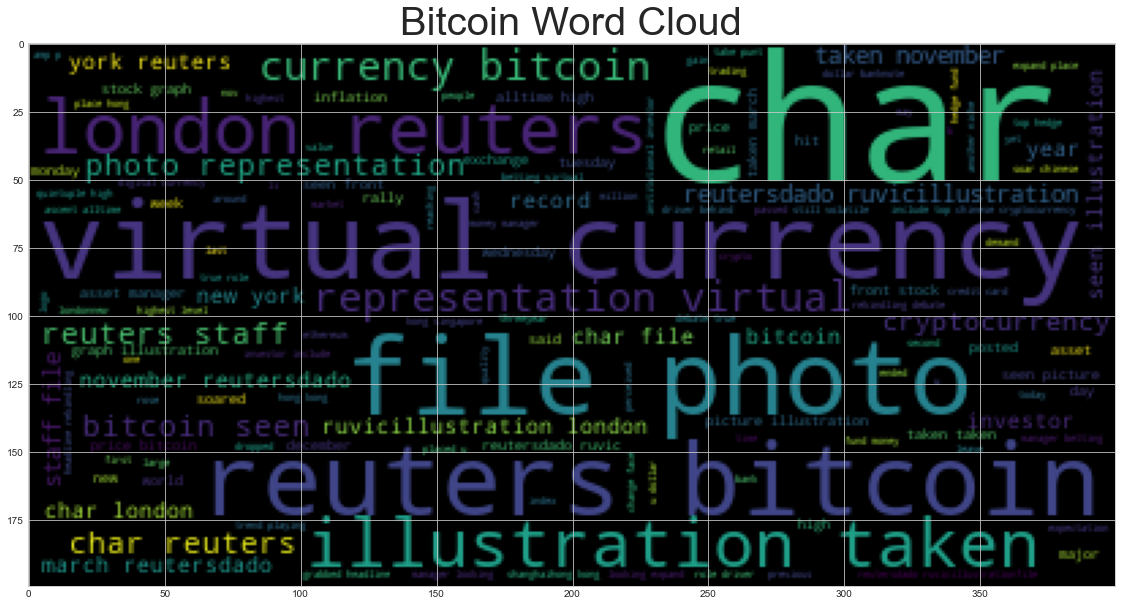

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_text=" ".join(all_bitcoin)

wc=WordCloud().generate(bitcoin_text)
plt.title("Bitcoin Word Cloud", fontsize=40)
plt.imshow(wc)

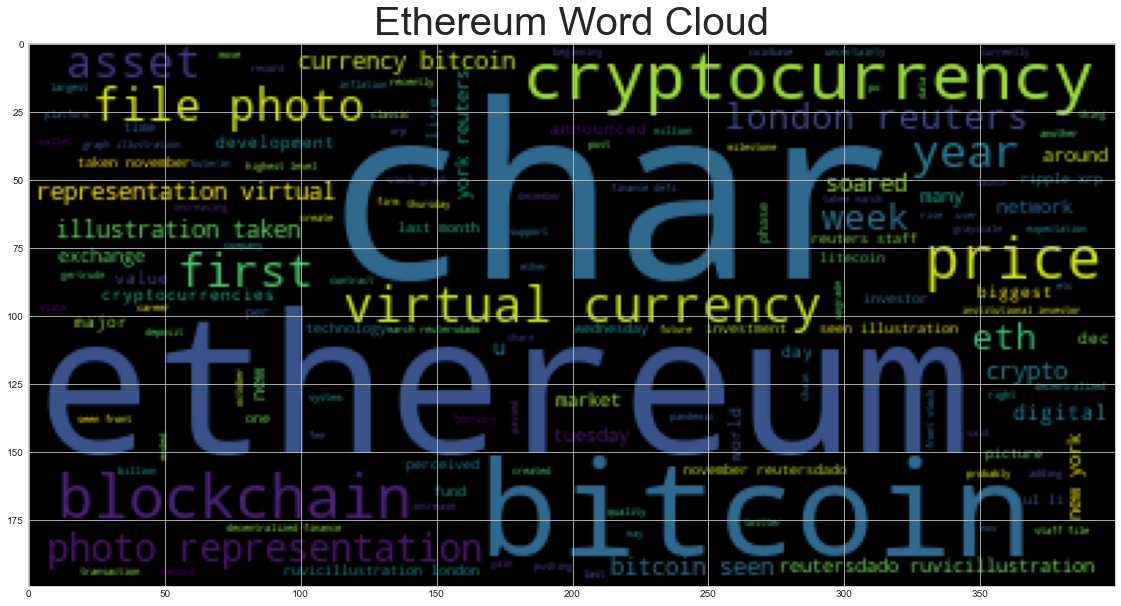

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_text=" ".join(all_ethereum)

wc=WordCloud().generate(ethereum_text)
plt.title("Ethereum Word Cloud", fontsize=40)
plt.imshow(wc)


# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

In [25]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model


## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
# Did this above
bitcoin_text

'visa partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish char reaching previous alltime high november th december st bitcoin trading well surpassed previous peak price bitcoins value rapidly char almost three year day since price bitcoin close breaking ceiling came crashing wednesday arbitrary milestone hodlers dream finally char november absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug char unlike conventional cryptocurrencies central bank control digital yuan case people bank china move give country power theory stability freq char youve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal char six year launch mexicobased crypotcurrency exchange financial service platform bitso company revealed closed million financing capitalize crypto char

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc=nlp(bitcoin_text)


# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [31]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style="ent")

In [33]:
# List all Entities
# YOUR CODE HERE!
entities=[ent.text for ent in doc.ents]
entities

['visa',
 'first',
 'bitcoin',
 'november',
 'december',
 'st bitcoin',
 'almost three year day',
 'wednesday',
 'november',
 'first',
 'next day',
 'central bank',
 'digital yuan',
 'past week',
 'bitcoin',
 'hype lie general mal',
 'six year',
 'million',
 'november',
 'today',
 'november',
 'monthly',
 'april fourthbest month',
 'one',
 'year day',
 'williams',
 'arya stark',
 'lady catelyn lord',
 'eddard acolyte',
 'monday',
 'twitt char',
 'bitcoin',
 'tuesday',
 'evening',
 'december',
 'one',
 'wednesday',
 'year',
 'reuters',
 'bitcoin u dollar',
 'january',
 'reutersdado',
 'london',
 'bitcoin',
 'reuters',
 'november',
 'reutersdado',
 'london reu char',
 'reutersdado',
 'tom wilson',
 'chavez',
 'justin harperbusiness',
 'bbc news',
 'bitcoin',
 'cur char',
 'bitcoin grabbed',
 'headline week',
 'reuters',
 'november',
 'reutersdado',
 'tokyo reuters bitcoin',
 'february',
 'reutersdado',
 'london',
 'reuters',
 'london reuters',
 'monday',
 'reuters',
 'reutersdado ruvicil

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
ethereum_text

'file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustration london reuters char file photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustration london reuters char london reuters digital currency ethereum xrp soared monday gaining momentum bitcoin powered towards alltime high file photo representation ethereum virtual currency char file photo representation virtual currency bitcoin seen picture illustration taken taken march reutersdado ruvicillustration london reuters major u cryptocurrency char file photo representation virtual currency bitcoin seen front stock graph illustration taken november reutersdado ruvicillustration london reuters major u char file photo representation virtual currency bitcoin seen picture illustration taken taken march reutersdado ruvicillustration london reuters major u cryptocurrency char new york re

In [38]:
# Run the NER processor on all of the text
doc=nlp(ethereum_text)


# Add a title to the document
doc.user_data["title"] = "Ethereum NER"


In [39]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style="ent")

In [40]:
# List all Entities
# YOUR CODE HERE!
entities_ethereum=[ent.text for ent in doc.ents]
entities_ethereum

['february',
 'reutersdado',
 'london',
 'reuters',
 'february',
 'reutersdado',
 'london',
 'reuters',
 'london reuters',
 'monday',
 'reutersdado ruvicillustration london',
 'reuters',
 'u cryptocurrency',
 'bitcoin',
 'november',
 'reutersdado ruvicillustration london',
 'u char',
 'reutersdado',
 'london',
 'reuters',
 'u cryptocurrency',
 'new york reuters institutional',
 'million',
 'week ended',
 'second',
 'new york reuters institutional',
 'million',
 'week ended',
 'second',
 'reuters',
 'november',
 'reuters',
 'november',
 'new york',
 'un',
 'december',
 'min',
 'contributor day ago',
 'u',
 'cynthia lummis',
 'char decentralized exchange',
 'crypto',
 'early february year',
 'one',
 'last month',
 'october',
 'million',
 'reuters',
 'november',
 'reutersdado ruvicillustration',
 'new york',
 'bitcoin btcbtsp',
 'reuters',
 'november',
 'reutersdado ruvicillustration',
 'new york',
 'bitcoin btcbtsp',
 'reuters',
 'november',
 'london',
 'bitcoin',
 'reuters',
 'reutersda